# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed by recursively splitting the dataset based on feature values to create branches that lead to leaf nodes. At each step, the algorithm chooses the feature and split point that best separates the data according to a specific criterion. This process continues until a stopping condition is met.
2. Trees handle non-linear relationships very well because they split the data space into regions without assuming any linear form. Each decision point partitions the space based on feature values, allowing complex and non-linear boundaries. In contrast, linear models assume a straight-line relationship between inputs and outputs, which limits their ability to model complex patterns unless you use transformations or interactions manually.
3. Gini impurity measures how "pure" a node is, or how mixed the classes are within a node. A lower Gini value means the node contains mostly one class, which is ideal for classification. It works well because it's sensitive to the distribution of classes and helps the tree algorithm choose splits that increase class homogeneity, improving predictive performance.
4. Trees tend to overfit because they can keep splitting until each leaf perfectly fits the training data, capturing noise instead of general patterns. This leads to poor performance on unseen data. To constrain overfitting, you can set a maximum depth or limit the minimum number of samples required to split or be at a leaf.
5. False. Trees perform well with both categorical and numerical features. In fact, they can handle numerical variables especially effectively by splitting at different threshold values. Trees don't require scaling of features and are robust to various data types. However, they are particularly intuitive with categorical variables because splits can naturally correspond to category groupings.
6. Most tree algorithms use binary splits because it simplifies the model and search process. With more than two branches, the computational complexity increases and the risk of overfitting rises, especially with high-cardinality features. Binary trees are easier to interpret and more efficient to train and evaluate.
7. Overfitting signs are very deep tree with many nodes and branches, leaves with only a few samples, and complex splits that don't generalize well. Underfitting signs are very shallow tree, poor accuracy on both training and test sets, and leaves with mixed class distributions.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [2]:
#1
import pandas as pd
df = pd.read_csv('cars_hw.csv')

# Number of observations and features
num_observations = df.shape[0]
num_features = df.shape[1]
print(f"Number of observations: {num_observations}")
print(f"Number of features: {num_features}")

# List of available variables
print("Available variables:")
print(df.columns.tolist())

# Display the first few rows
print("\nFirst few rows of the dataset:")
display(df.head())

Number of observations: 976
Number of features: 12
Available variables:
['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']

First few rows of the dataset:


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [3]:
#2.
from sklearn.model_selection import train_test_split

# Drop the index column if present
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Define categorical and numeric variables
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

# One-hot encode categorical variables and keep numeric ones
df_encoded = pd.get_dummies(df[categorical_vars + numeric_vars + [target_var]], drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop(columns=[target_var])
y = df_encoded[target_var]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes for verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (780, 45)
X_test shape: (196, 45)
y_train shape: (780,)
y_test shape: (196,)


Best min_samples_leaf: 5 with R² = 0.8253


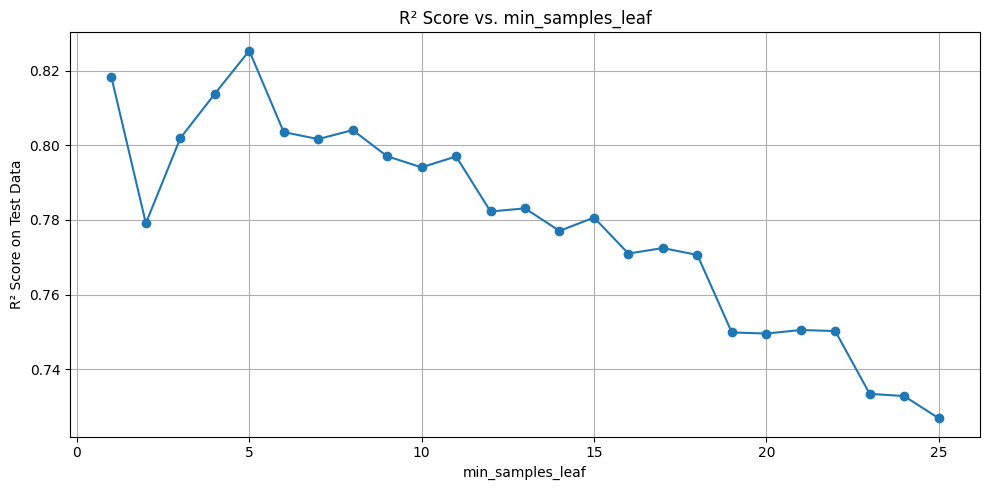

In [5]:
#3.
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

r2_scores = []

# Loop through values from 1 to 25
for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf_size, r2))

# Find leaf size with the best R² score
best_leaf_size, best_r2 = max(r2_scores, key=lambda x: x[1])

# best result
print(f"Best min_samples_leaf: {best_leaf_size} with R² = {best_r2:.4f}")

# Plot of R² scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 26), [score for _, score in r2_scores], marker='o')
plt.title("R² Score vs. min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("R² Score on Test Data")
plt.grid(True)
plt.tight_layout()
plt.show()

R² score: 0.8019
RMSE: 150732.29


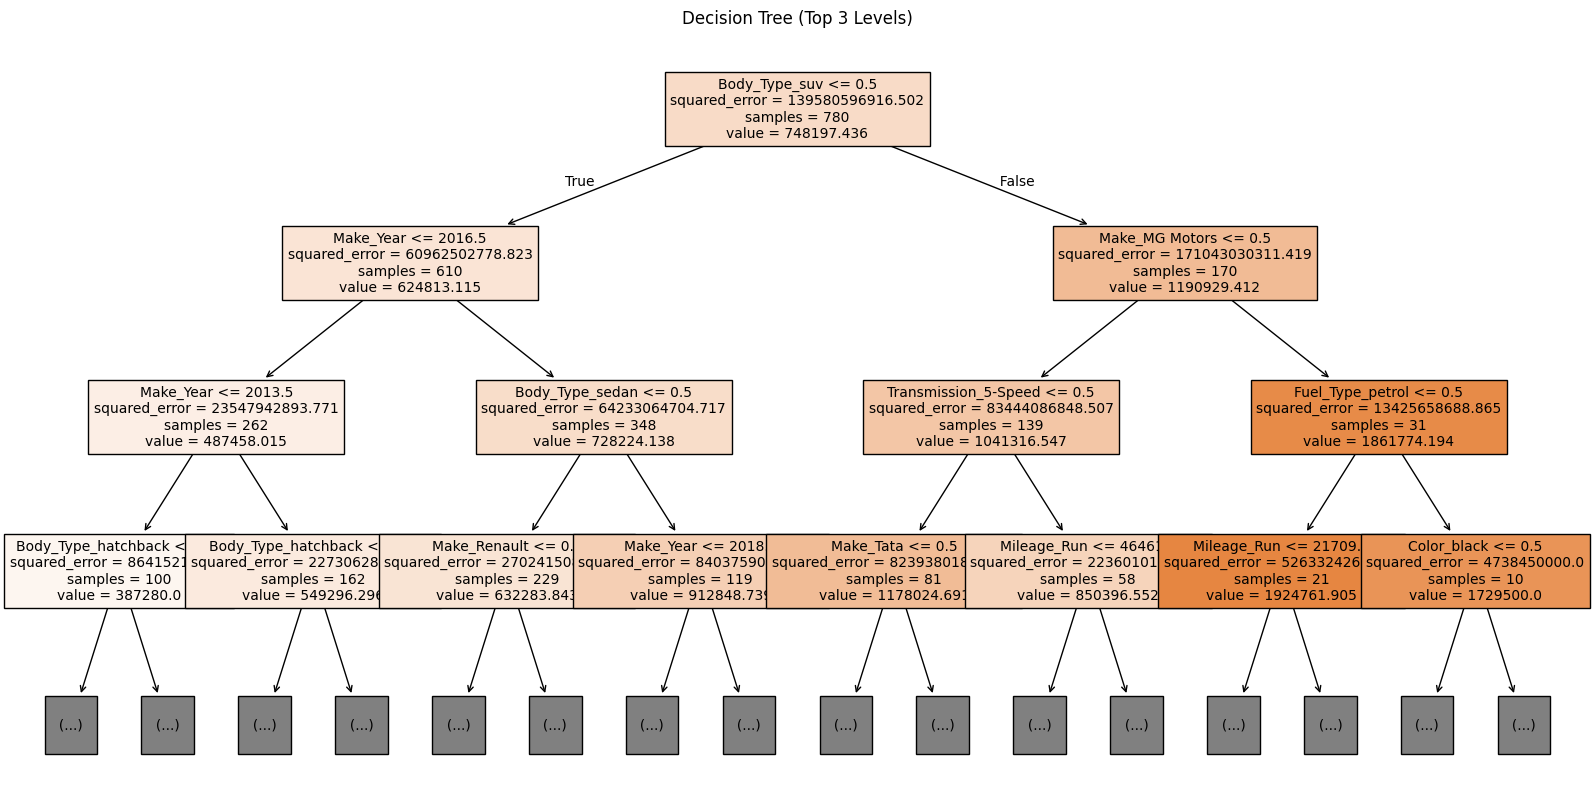

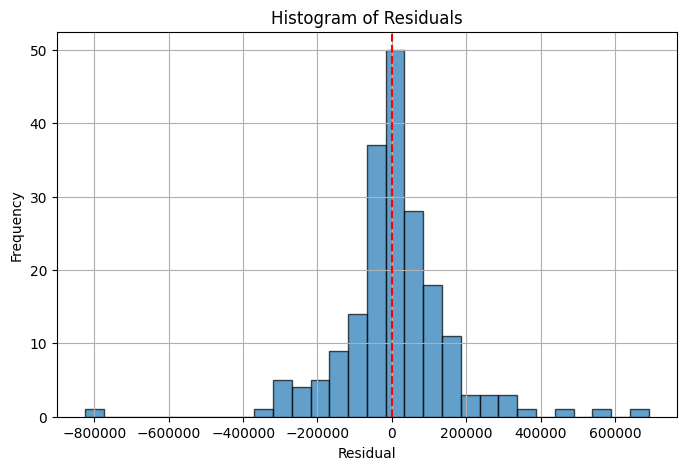


Residual statistics:
count       196.000000
mean       9025.425170
std      150847.147778
min     -825000.000000
25%      -52583.333333
50%        3791.666667
75%       76800.000000
max      691000.000000
Name: Price, dtype: float64


In [6]:
#4.
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Train the model with min_samples_leaf=3
model = DecisionTreeRegressor(min_samples_leaf=3, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print scores
print(f"R² score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Plot decision tree (top 3 levels only for clarity)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

# Compute residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Display summary statistics for residuals
print("\nResidual statistics:")
print(residuals.describe())

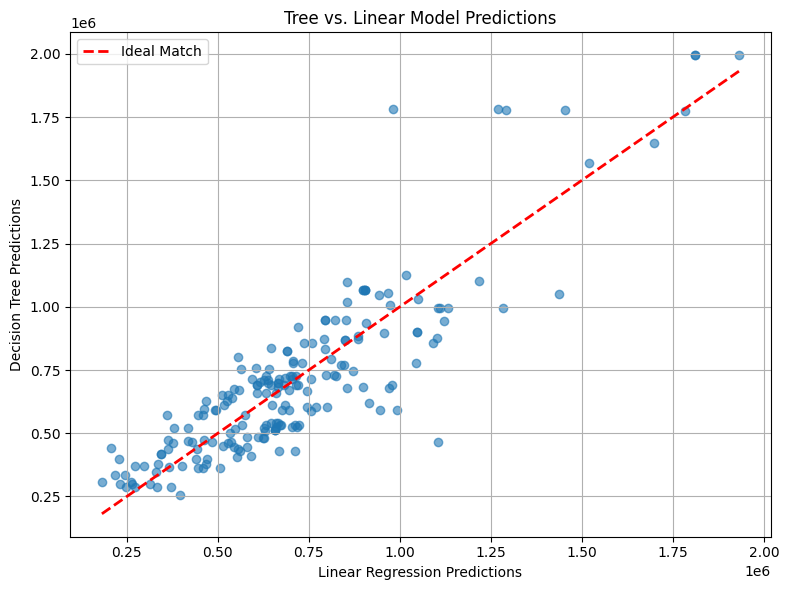

In [7]:
#6.
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict on test set using both models
y_pred_lin = lin_model.predict(X_test)
y_pred_tree = model.predict(X_test)  # Decision tree model trained earlier

# Scatter plot of predictions from both models
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.6)
plt.plot(
    [y_pred_lin.min(), y_pred_lin.max()],
    [y_pred_lin.min(), y_pred_lin.max()],
    'r--',
    lw=2,
    label="Ideal Match"
)
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Tree vs. Linear Model Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [8]:
#1.
import pandas as pd

df_ratings = pd.read_csv('corporate_ratings.csv')

# Get number of observations and variables
num_obs = df_ratings.shape[0]
num_vars = df_ratings.shape[1]

# Print out the shape
print(f"Number of observations: {num_obs}")
print(f"Number of variables: {num_vars}")

# Display the first few rows
print("\nFirst few rows of data:")
display(df_ratings.head())

Number of observations: 2029
Number of variables: 31

First few rows of data:


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


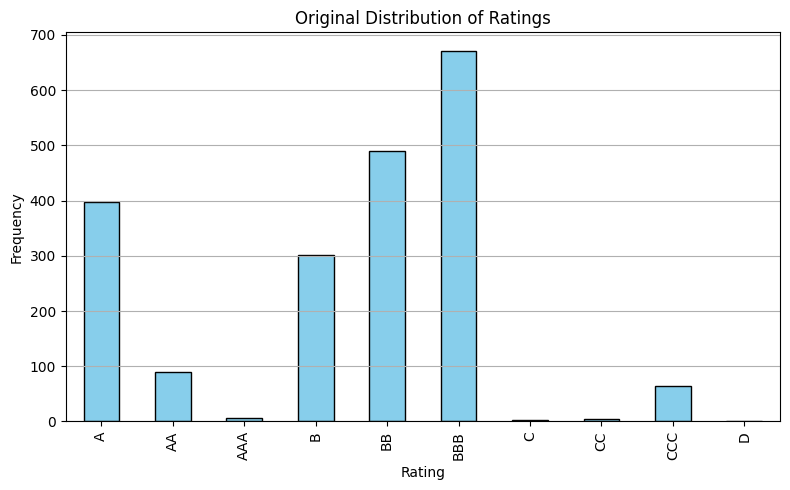

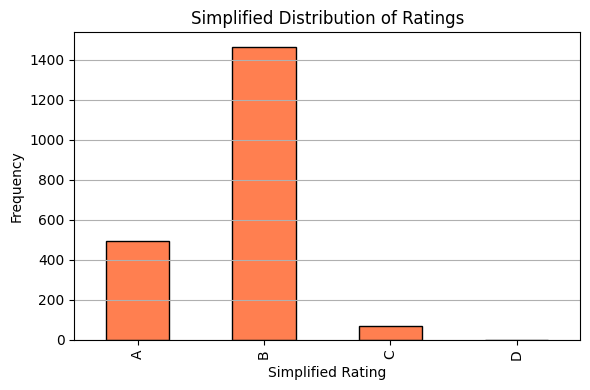

In [9]:
#2.
import pandas as pd
import matplotlib.pyplot as plt

# Distribution of Rating
plt.figure(figsize=(8, 5))
df_ratings['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Original Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Function to simplify ratings
def simplify_rating(rating):
    if isinstance(rating, str):
        if rating.startswith('A'):
            return 'A'
        elif rating.startswith('B'):
            return 'B'
        elif rating.startswith('C'):
            return 'C'
        elif rating.startswith('D'):
            return 'D'
    return 'Other'

# Apply simplification
df_ratings['Simplified_Rating'] = df_ratings['Rating'].apply(simplify_rating)

# Plot of simplified distribution
plt.figure(figsize=(6, 4))
df_ratings['Simplified_Rating'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.title("Simplified Distribution of Ratings")
plt.xlabel("Simplified Rating")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
#3.

# Drop excluded columns
excluded_columns = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
df_features = df_ratings.drop(columns=excluded_columns)

# One-hot encode the Sector variable
df_features = pd.get_dummies(df_features, columns=['Sector'], drop_first=True)

# Define the feature matrix X (exclude target column)
X = df_features.drop(columns=['Simplified_Rating'])

# Display shape and a preview
print(f"X shape: {X.shape}")
display(X.head())

X shape: (2029, 36)


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


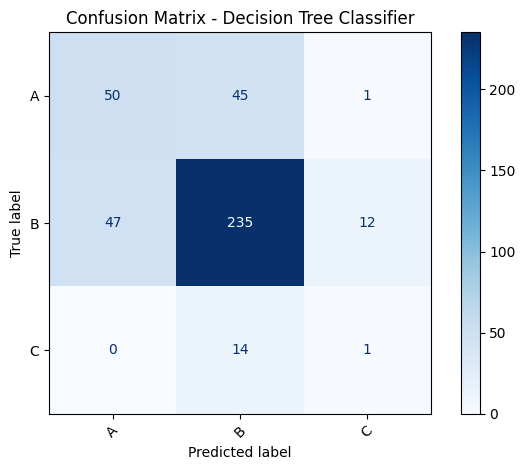

Accuracy: 0.7044


In [12]:
#4.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the target variable
y = df_ratings['Simplified_Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.tight_layout()
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")

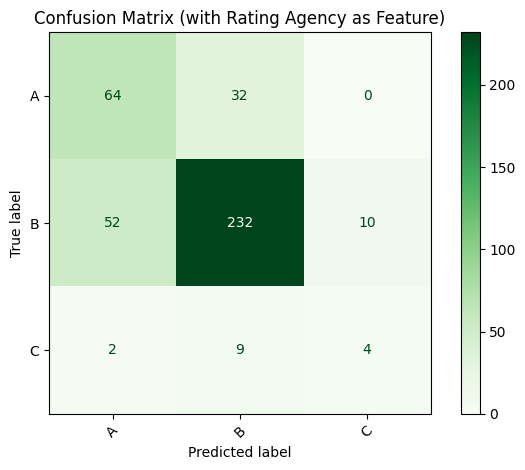

Accuracy with Rating Agency: 0.7389


In [15]:
#5.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Reload dataset with Rating Agency Name included
df_with_agency = pd.read_csv('corporate_ratings.csv')

# Simplify the Rating
def simplify_rating(rating):
    if isinstance(rating, str):
        if rating.startswith('A'):
            return 'A'
        elif rating.startswith('B'):
            return 'B'
        elif rating.startswith('C'):
            return 'C'
        elif rating.startswith('D'):
            return 'D'
    return 'Other'

df_with_agency['Simplified_Rating'] = df_with_agency['Rating'].apply(simplify_rating)

# Drop columns
excluded_columns = ['Rating', 'Date', 'Name', 'Symbol']
df_with_agency = df_with_agency.drop(columns=excluded_columns)

# One-hot encode 'Sector' and 'Rating Agency Name'
df_with_agency = pd.get_dummies(df_with_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

# Define feature matrix X and target y
X_agency = df_with_agency.drop(columns=['Simplified_Rating'])
y_agency = df_with_agency['Simplified_Rating']

# Train-test split
X_train_agency, X_test_agency, y_train_agency, y_test_agency = train_test_split(
    X_agency, y_agency, test_size=0.2, random_state=42)

# Train the decision tree
clf_agency = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf_agency.fit(X_train_agency, y_train_agency)

# Predict and evaluate
y_pred_agency = clf_agency.predict(X_test_agency)
conf_matrix_agency = confusion_matrix(y_test_agency, y_pred_agency, labels=clf_agency.classes_)
accuracy_agency = accuracy_score(y_test_agency, y_pred_agency)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_agency, display_labels=clf_agency.classes_)
disp.plot(cmap="Greens", xticks_rotation=45)
plt.title("Confusion Matrix (with Rating Agency as Feature)")
plt.tight_layout()
plt.show()

# Print accuracy
print(f"Accuracy with Rating Agency: {accuracy_agency:.4f}")

Including the Rating Agency Name as a feature increased the model accuracy from 70.4% to approximately 73.9%. This suggests that the issuer’s rating also depends on who is doing the rating